# 統計的検定
## 問題設定
あやめデータで、`virginica` のsepal length (cm)は `setosa` よりも大きいと言って良いか？

In [14]:
import numpy as np
import pandas as pd

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# あやめデータの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

target_name_data = []
for target in iris.target:
    target_name_data.append(iris['target_names'][target])
iris_df['target'] = np.array(target_name_data)

In [12]:
# setosa種とvirginica種のsepal lengthの平均値の違い？
print("setosa種: ", iris_df[iris_df.target == 'setosa']['sepal length (cm)'].mean())
print("virginica種: ", iris_df[iris_df.target == 'virginica']['sepal length (cm)'].mean())

setosa種:  5.005999999999999
virginica種:  6.587999999999998


(4, 8)

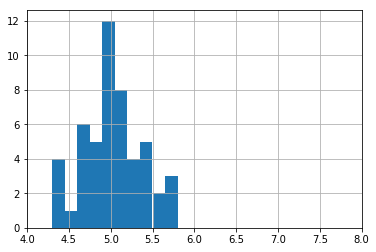

In [23]:
# ヒストグラムで比較
iris_df[iris_df.target == 'setosa']['sepal length (cm)'].hist()
plt.xlim(4, 8)

(4, 8)

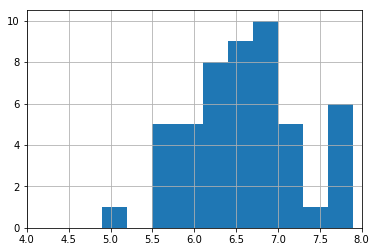

In [26]:
# ヒストグラムで比較
iris_df[iris_df.target == 'virginica']['sepal length (cm)'].hist()
plt.xlim(4, 8)

## 統計的検定
### 検定
上記のような意思決定をもう少し決まったプロセスに沿って意思決定を行いたい場合に「検定」という方法を取ることができ、実際のビジネスでよく活用されている。

#### 検定の基本コンセプト
- 「帰無仮説（差がない、など）」と「対立仮説（差がある、など）」の2つの仮説をおく
- 得られた標本から上記を検証できる何らかの統計量を計算する（＝標本統計量、例えば差がどの程度かなど）
- その統計量の起こりやすさ（p値）を計算
- あらかじめ設定したp値（棄却域）よりも得られた標本統計量のp値が低ければ通常起こりうる誤差の範囲を超えていると判断
- 帰無仮説が棄却されると対立仮説が採択される（つまり両者に差がある）と結論付けられる

### t検定（ウェルチのt検定）
検定には様々な方法があるが、上記のような2群の平均値の比較に関して「t検定」と呼ばれる手法がよく用いられ、以下のようなプロセスになる。

t検定の基本コンセプトは「2つの標本の平均値の差に関する統計量を求めて、その値がどのくらいすごいことなのか（起こりにくいのか）を判断する」というもの。

以下のSTEPで行う。

#### 1. 「帰無仮説（差がない、など）」と「対立仮説（差がある、など）」の2つの仮説をおく
t検定では帰無仮説を「平均値に差はない」、対立仮説を「平均値に差がある（差がないとは言えない）」と設定する

#### 2. t値と呼ばれる誤差を考慮した標本間の平均の差を求める
まずは、標準誤差$SE$と呼ばれる、「得られた推定値（平均値の差）が変動しそうな範囲」を分散Vを元に計算する。

以下はXとYの2つの標本がそれぞれ、サンプルサイズn, mである場合を想定。

$$
V =  
\frac{\sum_{i=1}^{n}(X_i - \overline{X})^2 + \sum_{i=1}^{n}(Y_i - \overline{Y})^2}
{n + m - 2}
$$

$$ SE = \sqrt{\frac{V}{n} + \frac{V}{n}} $$

標本平均の差を標準誤差$SE$で割る。

$$ t値 = \frac{\overline{X} - \overline{Y}}{SE} $$

平均値の差が大きいほどt値は大きくなり、標準誤差が大きいほどt値は小さくなる。

#### 4. 求められたt値をp値に変換
t値についてその値がどの程度起こりやすいかを表したp値と呼ばれる値に変換する。

p値の計算プロセスは実務上特に意識する必要はありませんが、t値が大きいほどp値は小さくなるというのは覚えておくと良い。

#### 5. 標本から得られたp値が棄却域に含まれているか判定
棄却域に対応するt値と標本から得られたt値を比べて、標本から得られたt値が棄却域に入っていたら帰無仮説を棄却。

棄却域はp<0.05で設定されることが慣習的に多い。

In [27]:
# t検定をしてみる、ライブラリを使うとt値とp値を同時に求めてくれる
from scipy import stats
t, p = stats.ttest_rel(iris_df[iris_df.target == 'setosa']['sepal length (cm)'], iris_df[iris_df.target == 'virginica']['sepal length (cm)'])

In [28]:
t, p

(-16.344145683358008, 1.789394192251355e-21)

## t検定の注意
有意差が出る3つの条件
- 平均値の差が大きい
- 分散が小さい（ばらつきが少ない）
- サンプルサイズが大きい

## 検定の注意
- 大量のデータを用いるとp値が小さくなり、帰無仮説が棄却されやすくなってしまう
- 検定を使えば必ず答えが出る訳ではなく、どのような背景知識を用いて意思決定をしているかを意識するのが良い

### その他の意思決定手法
- 信頼区間
- ベイズ推定

### 参考図書
- 理論など： 丹後 俊郎 (著) 『新版 統計学のセンス ―デザインする視点・データを見る目―』
- 実務観点: 上田 拓治 (著) 『44の例題で学ぶ統計的検定と推定の解き方』